# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook (delivered as a PDF). Detailed instructions for that assignment are provided in Canvas.</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

# Project Proposal

<div class="alert alert-block alert-info">The intent of this assignment is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

Data Source: UCI Machine Learning Repository.
File Type: CSV

Data Description: I am using a single data source featuring survey data collected by "Amazon Mechanical Turk" that asks the respondant if they would accept a coupon under different driving scenarios.

Link to Data Set Description:https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation
Linke to Data Source:https://archive.ics.uci.edu/ml/machine-learning-databases/00603/
    

<div class="alert alert-block alert-success"><b>Step 2 (2 pts)</b>: Briefly explain why you chose this data.</div>

This data seems well suited for an EDA project with many fields that may or may not be related to an outcome (accept or do not accept coupon). I tried to choose a moderately complex data set/project that I could potentially market to employers while not taking on too much. This project will demonstrate that I can use Python to derive insights to optimize potential customer engagement. All attributes are well defined in the Data Set Descitption.

<div class="alert alert-block alert-success"><b>Step 3 (1 pt)</b>: Provide a brief overview of your goals for this project.</div>

My ultimate goal for this project is to discern when a respondant would be most likely to accept a coupon. My sub goals would be:
    1) Perform basic EDA to understand data attributes.
    2) Clean data - decide which attributes to keep, format important attributes as needed, calculate new columns as needed.
    3) Run regressions to identify attributes associated with coupon response.

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.</div>

In [173]:
import pandas as pd

df = pd.read_csv('CouponSurvey.csv')

In [174]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-success"><b>Step 5 (1 pt)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [175]:
# TODO: Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.

df.info()

# TODO: Use the head() method to inspect the first five (or more) rows of the data

df.head()

# TODO: Use the tail() method to inspect the last five (or more) rows of the data

df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 6 through 10 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 6 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

1) I hope to learn which variables (IE income, destination, weather) are most related to whether a respondant will accept the offered coupon. From that, can I reasonably estimate if a respondant will accept the offered coupon? I am also interested in the potential social answers from the data set. IE if a person is alone, will they want to go to a restaraunt? If they rarely go to restaurants, will they want to go to one for a coupon?

2) I have a hunch that intuitive logic will hold. IE if there is no urgent destination, the respondant will be more likley to accept the coupon. If the restuarant/bar the coupon is for is in the same direction as the repsondant's destination, they will be more likely to accept the coupon. Overall I have a hunch there are enough fields related to the respondant's decision that I will be able to reasonably estimate if the coupon will be accepted.

<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
</div>

My data contains 12,684 responses to a survey from respondants who were paid to complete the survey. There were no restirctions to the demographic of the survey respondant that I know of.

<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</div>

Data was collected using Amazon Mechanical Turk. This is a service where "turkers" are paid to answer survey questions. To my knowledge, all survey responses were included.

This data is not weighted. This is survey sample data, containing all responses from Turkers who chose to take the survey.


<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. Also indicate which variables will be used for your purposes.</div>

In [213]:
DataDic = pd.read_csv('ColumnNames.csv', index_col = 'Column')
DataDic

,Type,Description,Will I use?
Column,,,
destination,Object,destination type,Yes
passanger,Object,passanger type,Yes
weather,Object,weather conditions,Yes
temperature,int64,farenheit,Yes
time,Object,time,Yes
coupon,Object,coupon type,Yes
expiration,Object,time before coupon expires,Yes
gender,Object,femaile/male,Yes
age,Object,age,Yes


I put together the above data dictionary. Note I got this information from the "Attribute Information" section where I found my data: 
https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

There is also a paper published on this data here:
https://jmlr.org/papers/volume18/16-003/16-003.pdf

<div class="alert alert-block alert-success"><b>Step 10 (10 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

In [11]:
# load up modules
import pandas as pd
import numpy as np
# load for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

count    12684.000000
mean         0.568433
std          0.495314
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64

<AxesSubplot:title={'center':'CouponDecision'}>

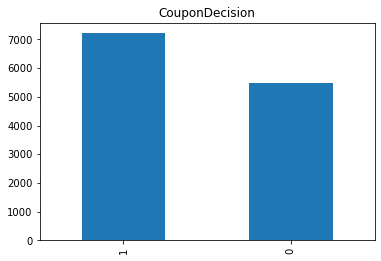

In [38]:
#Get general info on each column in my data and look at the dependent/outcome variable more closely

df.info()
df['Y'].describe()
df['Y'].value_counts().plot(kind='bar', title='CouponDecision') #see distribution of survey results



count              108
unique               5
top       do not drive
freq                22
Name: car, dtype: object

<AxesSubplot:title={'center':'CarAnswers'}>

(12684, 26)

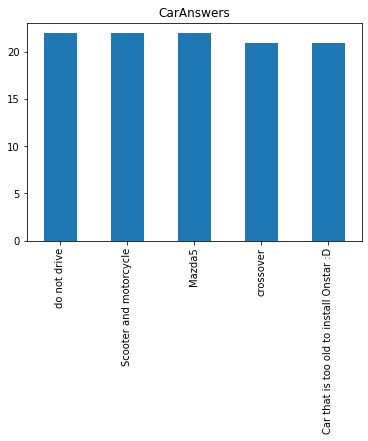

In [66]:
# With only 108 non-null values, do I drop the car column?
df['car'].describe()
df['car'].value_counts().plot(kind='bar', title='CarAnswers') #see distribution of Car results
df.shape


The point of this survey is to see when a driver would accept a coupon. A lot of the scenarios/variable are related to driving, so I do not want to include the responses from people who do not drive.
`
I am dropping the 22 "do not drive" responses

In [72]:
df['car'].value_counts()
df.shape

do not drive                                22
Scooter and motorcycle                      22
Mazda5                                      22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

(12684, 26)

In [176]:
drop_car_rows = df[df['car'] == 'do not drive'].index
df.drop(drop_car_rows, inplace = True)
df.shape


(12662, 26)

I am now dropping the "car" column because there were only 108 (now 86) non null values

In [177]:
df = df.drop(['car'], axis = 1)
df.shape

(12662, 25)

In [178]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


I'm going to look at the distribution of responses for other columns with null values now.

In [179]:
df['Bar'].value_counts()
df['CoffeeHouse'].value_counts()
df['CarryAway'].value_counts()
df['RestaurantLessThan20'].value_counts()
df['Restaurant20To50'].value_counts()

df.shape

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       327
Name: Bar, dtype: int64

less1    3363
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

1~3      4650
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

1~3      5354
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

less1    6077
1~3      3268
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

(12662, 25)

I'm going to drop all 605 rows with null values.

In [180]:
df.dropna(inplace = True)

df.shape


(12057, 25)

I am going to look at the distribution of responses for the toCoupon_Gec... and direction fields

In [181]:
df['toCoupon_GEQ5min'].value_counts()
df['toCoupon_GEQ15min'].value_counts()
df['toCoupon_GEQ25min'].value_counts()
df['direction_same'].value_counts()
df['direction_opp'].value_counts()


1    12057
Name: toCoupon_GEQ5min, dtype: int64

1    6766
0    5291
Name: toCoupon_GEQ15min, dtype: int64

0    10619
1     1438
Name: toCoupon_GEQ25min, dtype: int64

0    9462
1    2595
Name: direction_same, dtype: int64

1    9462
0    2595
Name: direction_opp, dtype: int64

I'm dropping the toCoupon_GEQ5min column because it only has one value. I'm dropping the direction_opp column because it is jsut an inverse of the direction_same column

In [182]:
df.shape
df = df.drop(['toCoupon_GEQ5min'], axis = 1)
df = df.drop(['direction_opp'], axis = 1)
df.shape

(12057, 25)

(12057, 23)

<AxesSubplot:>

80    6215
55    3655
30    2187
Name: temperature, dtype: int64

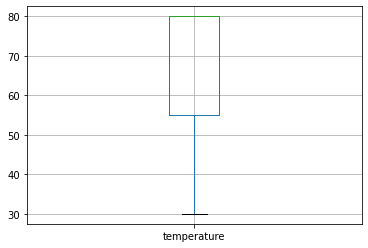

In [198]:
df.boxplot('temperature')
df['temperature'].value_counts()

I do not think there are outliers in my data because my data contains answers from a list of possible answers. For example, the  "Bar" column questions the respondant how many times they go to a bar per month. If they go to a bar more than eight times, they select "gt8" (greater than eight).

In [212]:
df.to_csv('CouponSurvey_Cleaned.csv', index = False)

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. Submit your <i><u>cleaned</u></i> data file along with the completed notebook up to this point for grading.</b></div>

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>

In [7]:
# load up modules
import pandas as pd
import numpy as np
# load for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [19]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [29]:
df = pd.read_csv('CouponSurvey_Cleaned.csv')

df.head()

df.shape

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,0


(12057, 23)

<div style="background-color:lightblue;">
Are there any strong correlations between numeric variables and the survey response? No:
</div>

Text(0.5, 1.0, 'Heatmap Numeric Relationships')

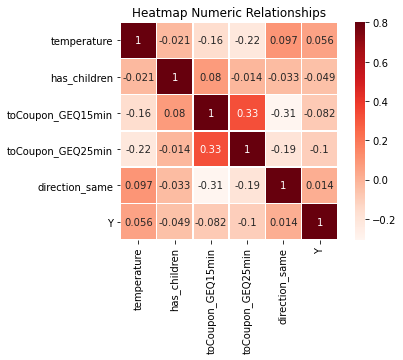

In [12]:
dfcorrmatt = df.corr()
dfcorrmatt
sns.heatmap(dfcorrmatt, vmax=.8, square=True, annot=True, cmap='Reds', linewidths=.5 )
plt.title('Heatmap Numeric Relationships')

In [13]:
dfnumeric = df._get_numeric_data()

dfnumeric.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
count,12057.000000,12057.000000,12057.000000,12057.000000,12057.000000,12057.000000
mean,63.351995,0.409223,0.561168,0.119267,0.215228,0.569545
std,19.126157,0.491711,0.496265,0.324116,0.410997,0.495160
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="background-color:lightblue;">
Other than temperature (which only has three possible values), my 5 other numeric columns contain yes/no (1/0) data. After some research, I did not find any reason to convert these binary (1/0) variables to categorical variables. Now I'm going to inspect my categorical variables.
</div>

In [14]:
catcols = df.select_dtypes(include=['object'])
catcols


,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
2,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
3,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12052,Home,Partner,Rainy,6PM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12053,Work,Alone,Rainy,7AM,Carry out & Take away,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12054,Work,Alone,Snowy,7AM,Coffee House,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3
12055,Work,Alone,Snowy,7AM,Bar,1d,Male,26,Single,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3


<AxesSubplot:title={'center':'destination'}>

<AxesSubplot:title={'center':'passanger'}>

<AxesSubplot:title={'center':'weather'}>

<AxesSubplot:title={'center':'time'}>

<AxesSubplot:title={'center':'coupon'}>

<AxesSubplot:title={'center':'expiration'}>

<AxesSubplot:title={'center':'gender'}>

<AxesSubplot:title={'center':'age'}>

<AxesSubplot:title={'center':'maritalStatus'}>

<AxesSubplot:title={'center':'education'}>

<AxesSubplot:title={'center':'occupation'}>

<AxesSubplot:title={'center':'income'}>

<AxesSubplot:title={'center':'Bar'}>

<AxesSubplot:title={'center':'CoffeeHouse'}>

<AxesSubplot:title={'center':'CarryAway'}>

<AxesSubplot:title={'center':'RestaurantLessThan20'}>

<AxesSubplot:title={'center':'Restaurant20To50'}>

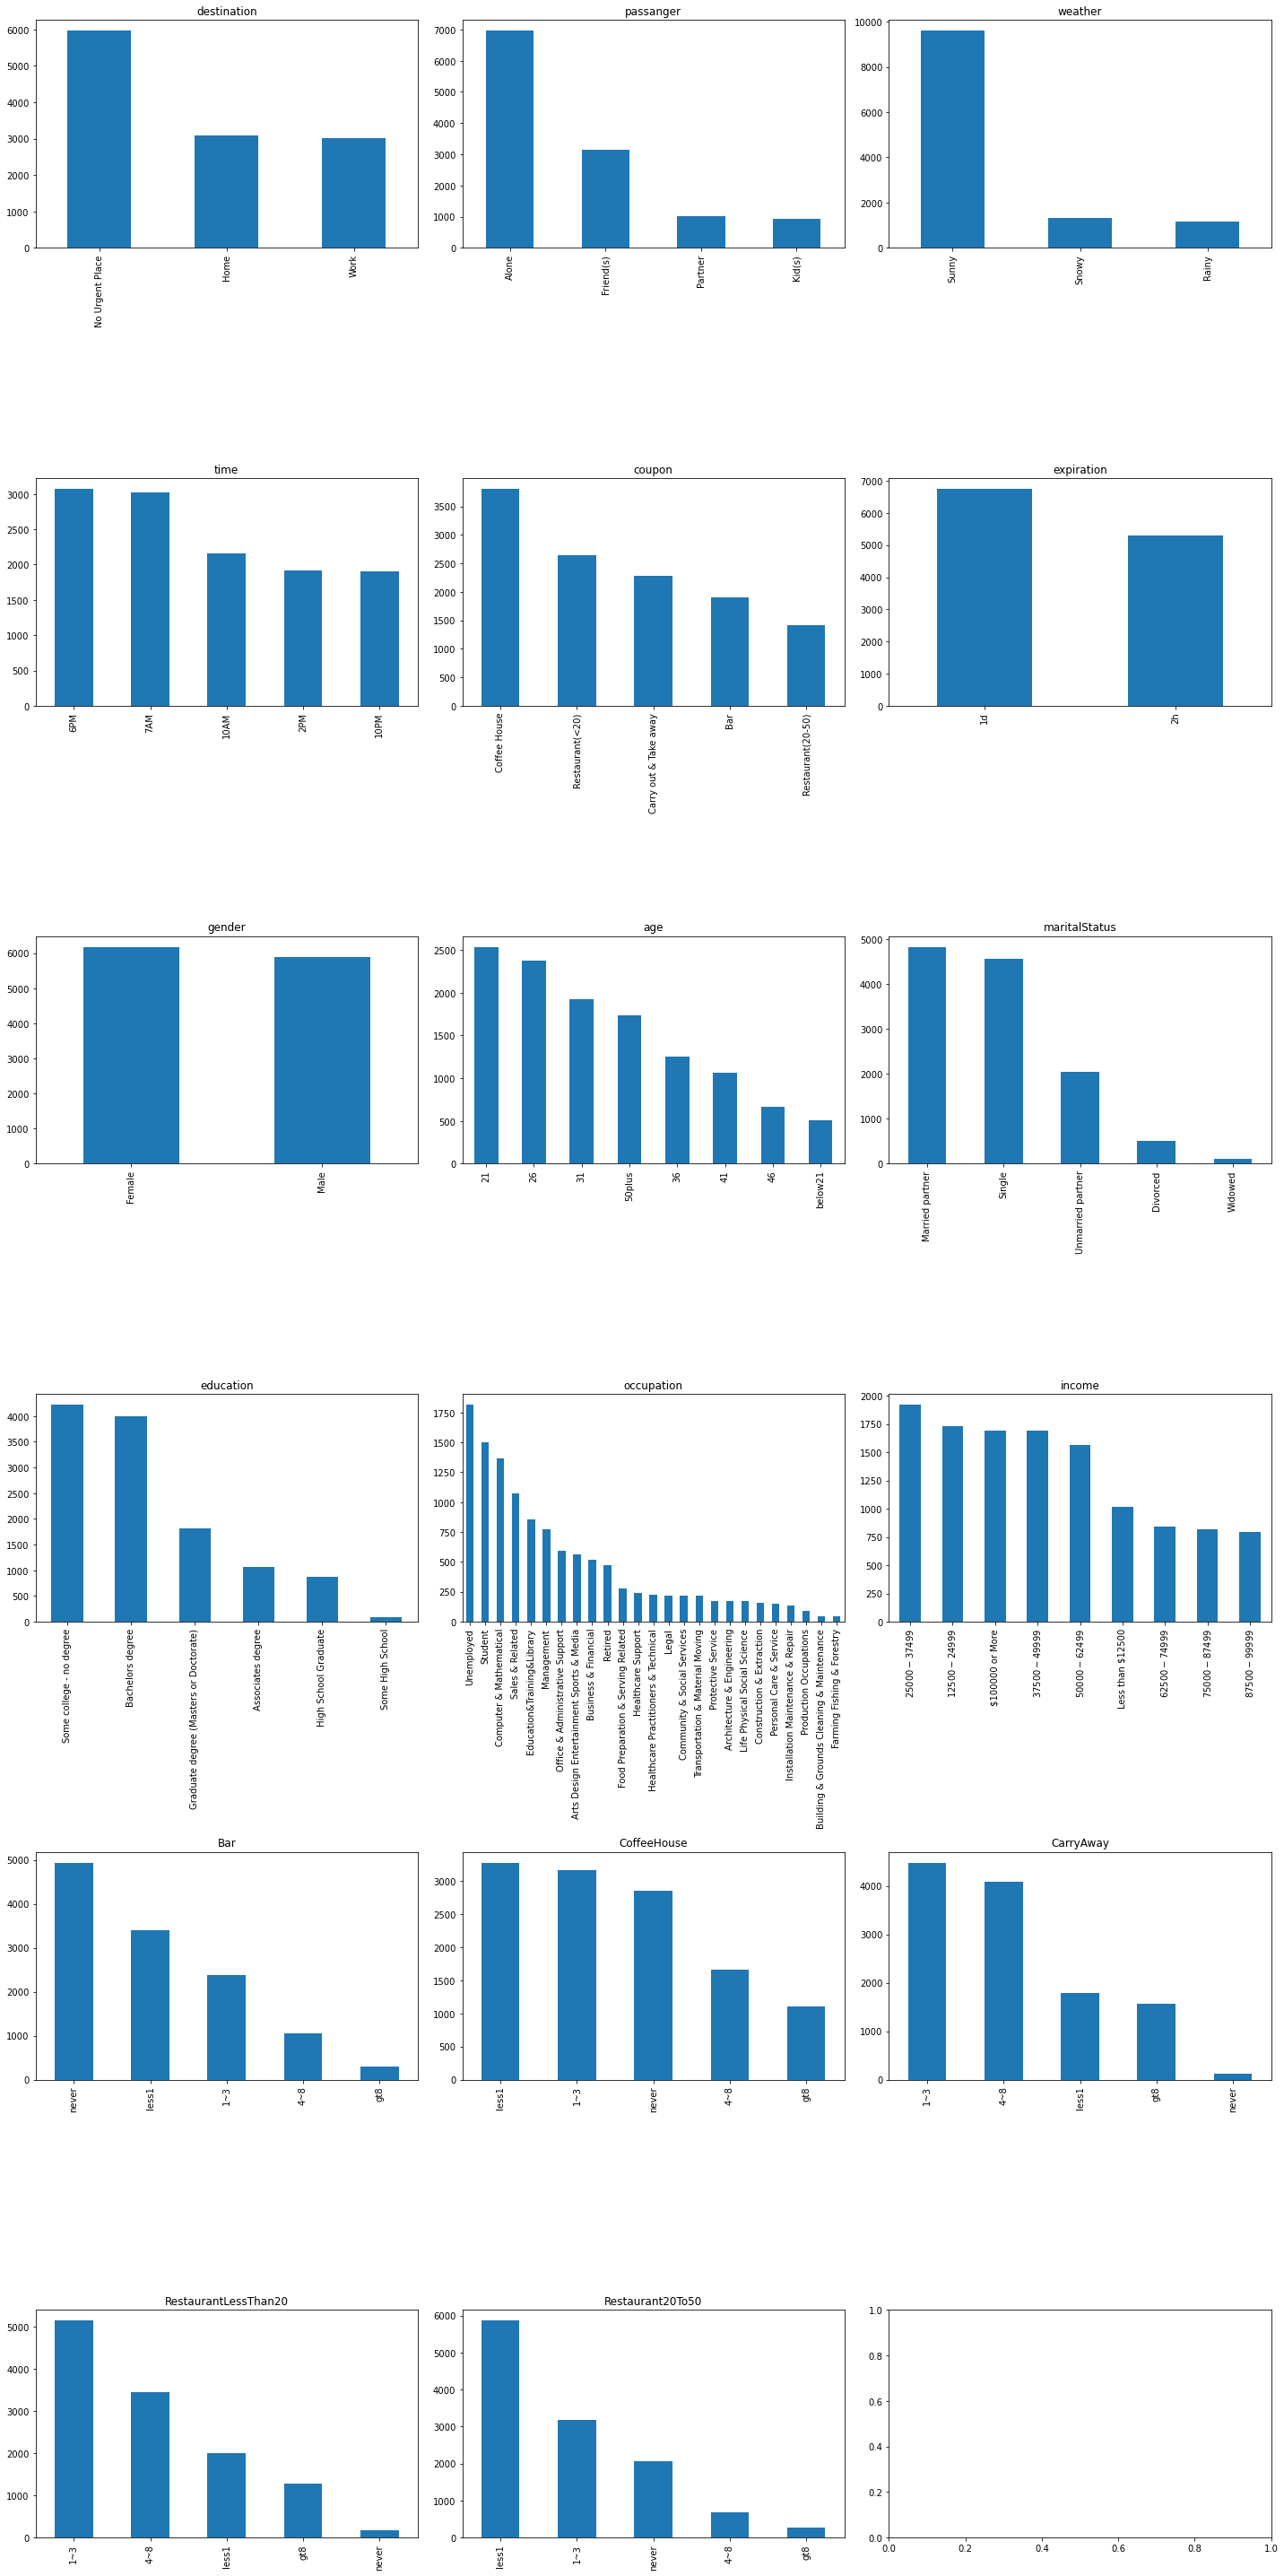

In [187]:
fig, ax = plt.subplots(6,3, figsize=(20,40))
for var, subplot in zip(catcols, ax.flatten()):
    df[var].value_counts().plot(kind='bar', ax=subplot, title=var)
plt.tight_layout()

<div style="background-color:lightblue;">
The above charts showed the distribution of responses for each categorical column. Now that I have a basic understanding of each column, I'm going to look at relationships between variables with Point Plots. These Point Plots will show how often a coupon was accepted by variable/variable selection. I aim to identify which variables contain responses that are most related to the outcome.
</div>

Text(0.5, 0.98, 'Variables vs Result')

<AxesSubplot:xlabel='destination', ylabel='Y'>

<AxesSubplot:xlabel='passanger', ylabel='Y'>

<AxesSubplot:xlabel='weather', ylabel='Y'>

<AxesSubplot:xlabel='temperature', ylabel='Y'>

<AxesSubplot:xlabel='time', ylabel='Y'>

<AxesSubplot:xlabel='coupon', ylabel='Y'>

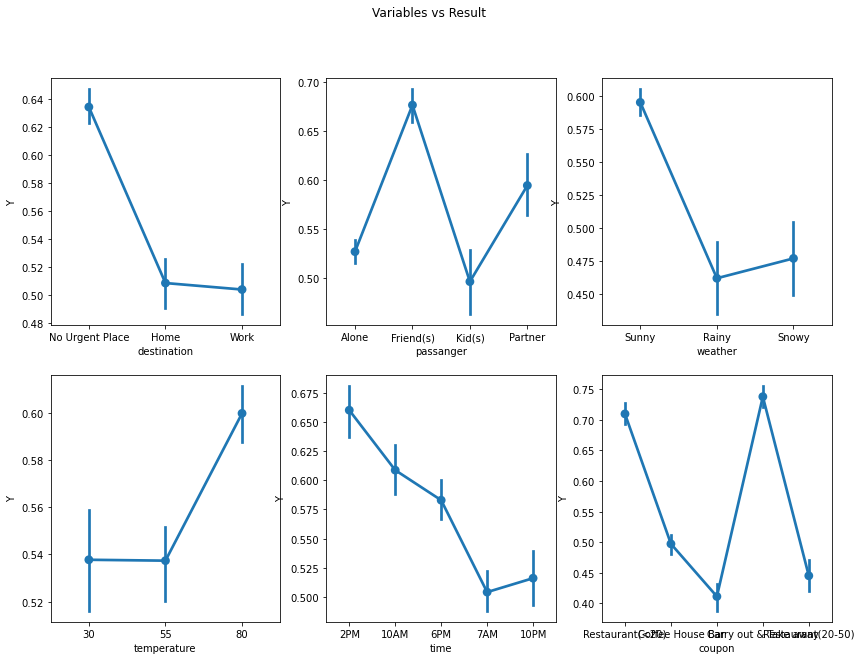

In [215]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

fig.suptitle('Variables vs Result')

sns.pointplot(ax=axes[0, 0], data=df, x='destination', y='Y')
sns.pointplot(ax=axes[0, 1], data=df, x='passanger', y='Y')
sns.pointplot(ax=axes[0, 2], data=df, x='weather', y='Y')
sns.pointplot(ax=axes[1, 0], data=df, x='temperature', y='Y')
sns.pointplot(ax=axes[1, 1], data=df, x='time', y='Y')
sns.pointplot(ax=axes[1, 2], data=df, x='coupon', y='Y')


<div style="background-color:lightblue;">
All columns but the temperature column showed a minimum 10% difference in the likeliohood of accepting between possible responses. IE the coupon was accepted if it was sunny 60% of the time, but only 47% of the time if rainy. With so many columns, I am going to focus on columns with at least a 10% difference in acceptance rate. So I will drop the Temperature column and any other column identified below at the end of this exercise.
</div>

Text(0.5, 0.98, 'Variables vs Result2')

<AxesSubplot:xlabel='gender', ylabel='Y'>

<AxesSubplot:xlabel='age', ylabel='Y'>

<AxesSubplot:xlabel='has_children', ylabel='Y'>

<AxesSubplot:xlabel='expiration', ylabel='Y'>

<AxesSubplot:xlabel='toCoupon_GEQ15min', ylabel='Y'>

<AxesSubplot:xlabel='toCoupon_GEQ25min', ylabel='Y'>

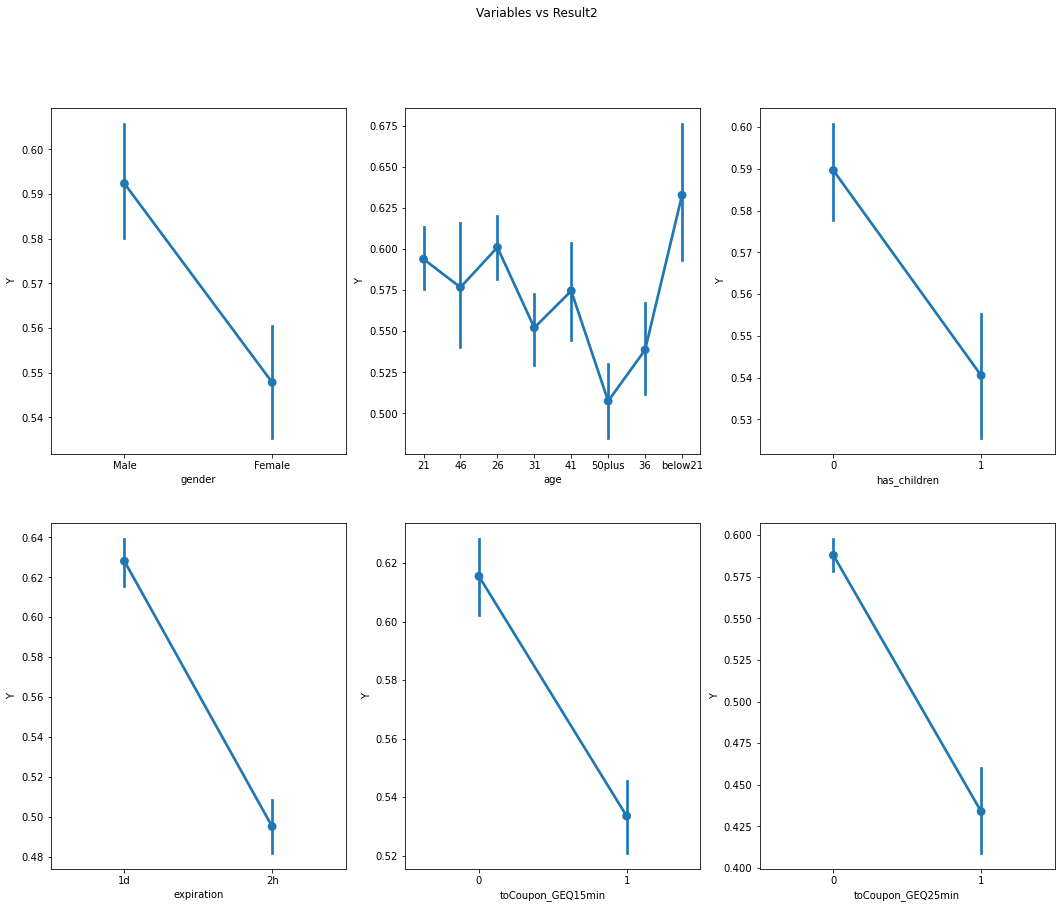

In [222]:
fig, axes = plt.subplots(2, 3, figsize=(18, 14))

fig.suptitle('Variables vs Result2')

sns.pointplot(ax=axes[0, 0], data=df, x='gender', y='Y')
sns.pointplot(ax=axes[0, 1], data=df, x='age', y='Y')
sns.pointplot(ax=axes[0, 2], data=df, x='has_children', y='Y')
sns.pointplot(ax=axes[1, 0], data=df, x='expiration', y='Y')
sns.pointplot(ax=axes[1, 1], data=df, x='toCoupon_GEQ15min', y='Y')
sns.pointplot(ax=axes[1, 2], data=df, x='toCoupon_GEQ25min', y='Y')

<div style="background-color:lightblue;">
I will drop the gender, has children, and toCoupon_GEQ15min columns as they do not display a strong relationship to the result.
</div>

Text(0.5, 0.98, 'Variables vs Result3')

<AxesSubplot:xlabel='education', ylabel='Y'>

<AxesSubplot:xlabel='occupation', ylabel='Y'>

<AxesSubplot:xlabel='income', ylabel='Y'>

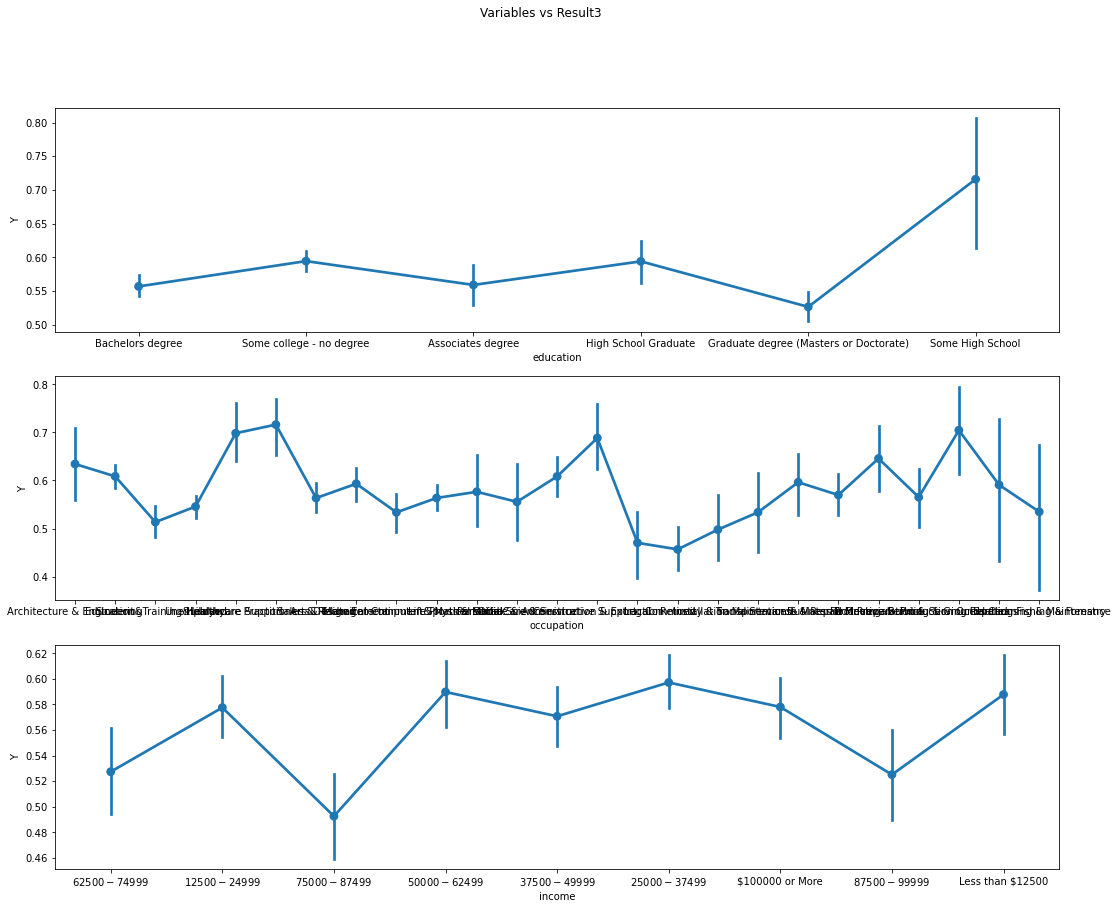

In [219]:
fig, axes = plt.subplots(3, 1, figsize=(18, 14))

fig.suptitle('Variables vs Result3')

sns.pointplot(ax=axes[0], data=df, x='education', y='Y')
sns.pointplot(ax=axes[1], data=df, x='occupation', y='Y')
sns.pointplot(ax=axes[2], data=df, x='income', y='Y')


<div style="background-color:lightblue;">
I'm not able to make sense of the results of the income field. IE both high and low incomes fall in categories of more likely to accept the coupon and vice versa. I am going to drop the income field.
</div>

In [30]:
df.shape
df = df.drop(['income'], axis = 1)
df.shape

(12057, 23)

(12057, 22)

In [228]:
df['Y'].groupby(df['occupation']).agg(['mean','count']).sort_values(by=['mean'], ascending = False)

,mean,count
occupation,,
Healthcare Practitioners & Technical,0.716216,222
Production Occupations,0.704545,88
Healthcare Support,0.698347,242
Construction & Extraction,0.688312,154
Protective Service,0.645714,175
Architecture & Engineering,0.634286,175
Student,0.608550,1497
Office & Administrative Support,0.608403,595
Transportation & Material Moving,0.596330,218


In [186]:
df['Y'].groupby(df['age']).agg(['mean','count']).sort_values(by=['mean'], ascending = False)

,mean,count
age,,
below21,0.632937,504
26,0.601178,2377
21,0.594009,2537
46,0.576807,664
41,0.574648,1065
31,0.552208,1925
36,0.538707,1253
50plus,0.507506,1732


<div style="background-color:lightblue;">
Looking at the distribution of results from the Occupation field more closely, we see that retired turkers are least likely to accept the coupon. From the age column chart above, we also saw that those 50+ were least likely to accept the coupon. It looks like as turkers age, they become less likely to accept the coupon.
</div>

Text(0.5, 0.98, 'Variables vs Result2')

<AxesSubplot:xlabel='CoffeeHouse', ylabel='Y'>

<AxesSubplot:xlabel='RestaurantLessThan20', ylabel='Y'>

<AxesSubplot:xlabel='Restaurant20To50', ylabel='Y'>

<AxesSubplot:xlabel='Bar', ylabel='Y'>

<AxesSubplot:xlabel='CarryAway', ylabel='Y'>

<AxesSubplot:xlabel='direction_same', ylabel='Y'>

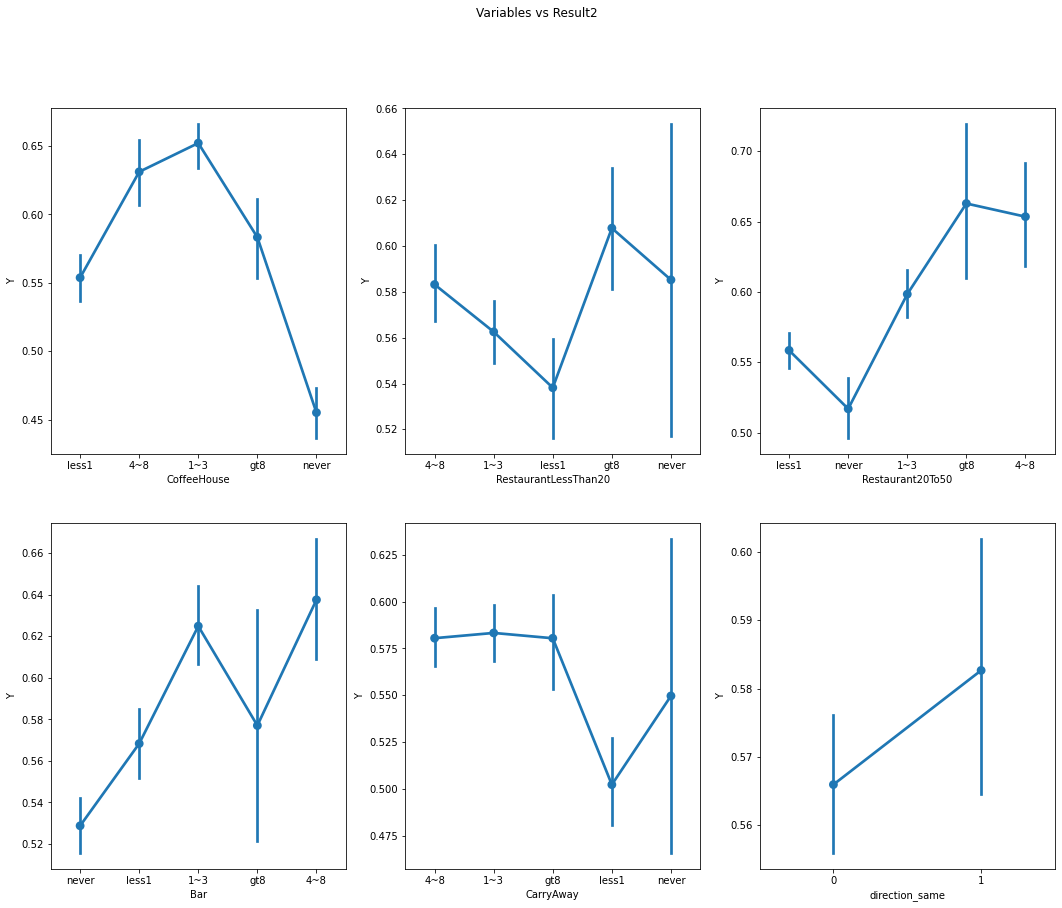

In [223]:
fig, axes = plt.subplots(2, 3, figsize=(18, 14))

fig.suptitle('Variables vs Result2')

sns.pointplot(ax=axes[0, 0], data=df, x='CoffeeHouse', y='Y')
sns.pointplot(ax=axes[0, 1], data=df, x='RestaurantLessThan20', y='Y')
sns.pointplot(ax=axes[0, 2], data=df, x='Restaurant20To50', y='Y')
sns.pointplot(ax=axes[1, 0], data=df, x='Bar', y='Y')
sns.pointplot(ax=axes[1, 1], data=df, x='CarryAway', y='Y')
sns.pointplot(ax=axes[1, 2], data=df, x='direction_same', y='Y')

<div style="background-color:lightblue;">
I'm going to drop the direction_same column with only a small difference in the result.
</div>

<div style="background-color:lightblue;">
I'm dropping all the other columns identified above here:
</div>

In [36]:
df.shape

df = df.drop(['temperature', 'gender', 'has_children', 'toCoupon_GEQ15min', 'direction_same'], axis = 1)

df.shape


(12057, 22)

(12057, 17)

<AxesSubplot:xlabel='maritalStatus', ylabel='Y'>

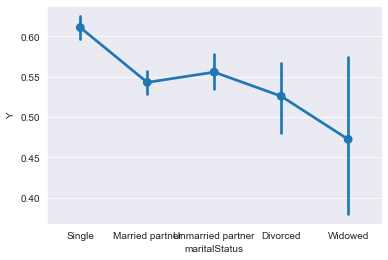

In [99]:
sns.pointplot(data=df, x='maritalStatus', y='Y')

<div style="background-color:lightblue;">

In this next section, I am going to address my social hunches raised in the project propsal. Is there a relationship between the type of place someone goes and coupon type accepted? Are turkers that go outside of their homes a lot in general more likley to accept a coupon? First I'm going to look at distribution of results for the coupon type field and see if I can identify any trends.
</div>

In [38]:
 df.head()

,destination,passanger,weather,time,coupon,expiration,age,maritalStatus,education,occupation,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,1
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,0
2,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,1
3,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,0
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,0


<div style="background-color:lightblue;">
The "coupon" column represents the type of coupon being offered. Were some coupons accepted more than others?
</div>

<AxesSubplot:xlabel='Y', ylabel='coupon'>

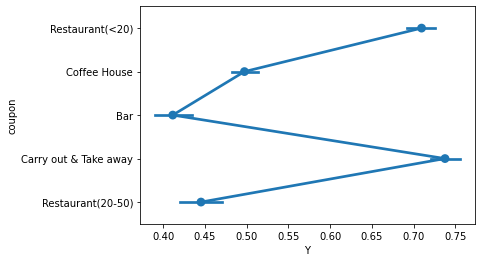

In [194]:
sns.pointplot(data=df, x='Y', y='coupon')

<div style="background-color:lightblue;">
Why are some coupon types accepted more than others? What is the distribution of the coupon type field?
</div>

In [214]:
df['coupon'].value_counts()

Coffee House             3809
Restaurant(<20)          2648
Carry out & Take away    2276
Bar                      1911
Restaurant(20-50)        1413
Name: coupon, dtype: int64

In [39]:
df_bar = df[df['Bar'] != 'never' ]

In [40]:
df_bar.head()

,destination,passanger,weather,time,coupon,expiration,age,maritalStatus,education,occupation,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ25min,Y
44,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,46,Married partner,Bachelors degree,Education&Training&Library,less1,1~3,1~3,1~3,less1,0,1
45,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,46,Married partner,Bachelors degree,Education&Training&Library,less1,1~3,1~3,1~3,less1,0,1
46,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,46,Married partner,Bachelors degree,Education&Training&Library,less1,1~3,1~3,1~3,less1,0,1
47,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,2h,46,Married partner,Bachelors degree,Education&Training&Library,less1,1~3,1~3,1~3,less1,0,1
48,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,46,Married partner,Bachelors degree,Education&Training&Library,less1,1~3,1~3,1~3,less1,0,1


<AxesSubplot:xlabel='Y', ylabel='coupon'>

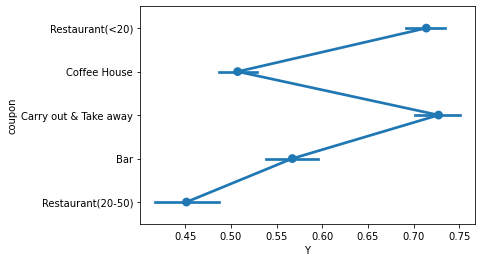

In [41]:
sns.pointplot(data=df_bar, x='Y', y='coupon')

In [42]:
df['Y'].groupby(df['coupon']).agg(['mean','count']).sort_values(by=['mean'], ascending = False)

,mean,count
coupon,,
Carry out & Take away,0.737698,2276
Restaurant(<20),0.709592,2648
Coffee House,0.497243,3809
Restaurant(20-50),0.445152,1413
Bar,0.411303,1911


In [43]:
df_bar['Y'].groupby(df['coupon']).agg(['mean','count']).sort_values(by=['mean'], ascending = False)

,mean,count
coupon,,
Carry out & Take away,0.727476,1343
Restaurant(<20),0.714015,1584
Bar,0.567231,1123
Coffee House,0.507324,2253
Restaurant(20-50),0.451220,820


<div style="background-color:lightblue;">
By Filtering out those who 'never' go to bars, the acceptance rate jumped from .41% to .57%. I'm going to create a true/false column that shows whether or not a turker goes to the destination that the coupon is being offered for at all. IE if the coupon type is bar and the turker never goes to the bar, this column will show "False". Otherwise it will show "True".
</div>

In [66]:
def frequent_type (row):
    if row['coupon'] == 'Bar' and row['Bar'] != 'never':
        return 'True'
    if row['coupon'] == 'Carry out & Take away' and row['CarryAway'] != 'never':
        return 'True'
    if row['coupon'] == 'Coffee House' and row['CoffeeHouse'] != 'never':
        return 'True'
    if row['coupon'] == 'Restaurant(<20)' and row['RestaurantLessThan20'] != 'never':
        return 'True'
    if row['coupon'] == 'Restaurant(20-50)' and row['Restaurant20To50'] != 'never':
        return 'True'
    else:
        return 'False'

In [67]:
df.apply(lambda row: frequent_type(row), axis=1)

0         True
1         True
2        False
3         True
4         True
         ...  
12052     True
12053     True
12054    False
12055    False
12056     True
Length: 12057, dtype: object

<div style="background-color:lightblue;">
Now I am adding the column that shows if the turker goes to the coupon destination type at all to my dataframe:
</div>

In [70]:
df.shape

df['coupon_type_match'] = df.apply(lambda row: frequent_type(row), axis=1)

df.shape

(12057, 17)

(12057, 18)

In [71]:
df.head()

,destination,passanger,weather,time,coupon,expiration,age,maritalStatus,education,occupation,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ25min,Y,coupon_type_match
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,1,True
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,0,True
2,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,1,False
3,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,0,True
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,21,Single,Bachelors degree,Architecture & Engineering,never,less1,4~8,4~8,less1,0,0,True


<div style="background-color:lightblue;">
Now I am going to see the distirbution of results from my added 'coupon_type_match' column. As shown, if a turker never goes to a coupon destination type, they only accept that coupon 21% of the time!
</div>

In [73]:
df['Y'].groupby(df['coupon_type_match']).agg(['mean','count']).sort_values(by=['mean'], ascending = False)

,mean,count
coupon_type_match,,
True,0.639421,10081
False,0.213057,1976


<div style="background-color:lightblue;">
Now I am going to create a social score numeric column that adds up how frequently a turker gets food/drinks out to eat at all coupon destination types. I want to create/map a social score fom these fields. IE never = 0, less 1 = 1, 1-3 = 2, 4-8 = 6, gt8 = 10. Then add up all those answers to get a total social score across all columns.
</div>

In [84]:
social_cats = {'never' : 0, 'less1' : 1, '1~3' : 2, '4~8': 6, 'gt8' : 10}

df['Bar_numeric'] = df['Bar'].map(social_cats)
df['CoffeeHouse_numeric'] = df['CoffeeHouse'].map(social_cats)
df['CarryAway_numeric'] = df['CarryAway'].map(social_cats)
df['RestaurantLessThan20_numeric'] = df['RestaurantLessThan20'].map(social_cats)
df['Restaurant20To50_numeric'] = df['Restaurant20To50'].map(social_cats)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12057 entries, 0 to 12056
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   destination                   12057 non-null  object
 1   passanger                     12057 non-null  object
 2   weather                       12057 non-null  object
 3   time                          12057 non-null  object
 4   coupon                        12057 non-null  object
 5   expiration                    12057 non-null  object
 6   age                           12057 non-null  object
 7   maritalStatus                 12057 non-null  object
 8   education                     12057 non-null  object
 9   occupation                    12057 non-null  object
 10  Bar                           12057 non-null  object
 11  CoffeeHouse                   12057 non-null  object
 12  CarryAway                     12057 non-null  object
 13  RestaurantLessTh

In [85]:
df.shape

df['social_score'] = df['Bar_numeric'] + df['CoffeeHouse_numeric'] + df['CarryAway_numeric'] + df['RestaurantLessThan20_numeric'] + df['Restaurant20To50_numeric']

df.shape

df.head(10)

(12057, 24)

(12057, 25)

,destination,passanger,weather,time,coupon,expiration,age,maritalStatus,education,occupation,...,toCoupon_GEQ25min,Y,coupon_type_match,bar_numeric,Bar_numeric,CoffeeHouse_numeric,CarryAway_numeric,RestaurantLessThan20_numeric,Restaurant20To50_numeric,social_score
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,21,Single,Bachelors degree,Architecture & Engineering,...,0,1,True,0,0,1,6,6,1,14
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,21,Single,Bachelors degree,Architecture & Engineering,...,0,0,True,0,0,1,6,6,1,14
2,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,21,Single,Bachelors degree,Architecture & Engineering,...,0,1,False,0,0,1,6,6,1,14
3,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,21,Single,Bachelors degree,Architecture & Engineering,...,0,0,True,0,0,1,6,6,1,14
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,21,Single,Bachelors degree,Architecture & Engineering,...,0,0,True,0,0,1,6,6,1,14
5,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,2h,21,Single,Bachelors degree,Architecture & Engineering,...,0,0,True,0,0,1,6,6,1,14
6,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,21,Single,Bachelors degree,Architecture & Engineering,...,0,0,True,0,0,1,6,6,1,14
7,No Urgent Place,Friend(s),Sunny,2PM,Restaurant(<20),1d,21,Single,Bachelors degree,Architecture & Engineering,...,0,1,True,0,0,1,6,6,1,14
8,No Urgent Place,Friend(s),Sunny,6PM,Coffee House,2h,21,Single,Bachelors degree,Architecture & Engineering,...,0,0,True,0,0,1,6,6,1,14
9,No Urgent Place,Friend(s),Sunny,6PM,Restaurant(<20),2h,21,Single,Bachelors degree,Architecture & Engineering,...,0,1,True,0,0,1,6,6,1,14


<div style="background-color:lightblue;">
I am going to check the distribution of results for the new 'social_score' column, where the higher the number, the more times a turker gets food/drink outside of their home.
</div>

In [86]:
df['Y'].groupby(df['social_score']).agg(['mean','count']).sort_values(by=['mean'], ascending = False)

,mean,count
social_score,,
38,0.772727,22
30,0.738636,176
25,0.706897,232
22,0.705882,408
33,0.704545,44
34,0.681818,132
29,0.676471,102
37,0.636364,22
27,0.636364,44


<AxesSubplot:xlabel='social_score', ylabel='Y'>

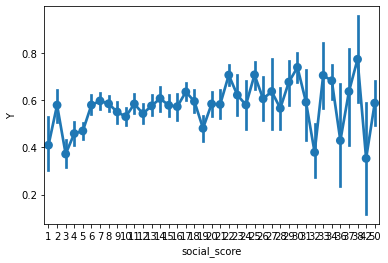

In [93]:
sns.pointplot(data=df, x='social_score', y='Y')

<div style="background-color:lightblue;">
I'm not seeing any relationships/trends from the social score column, so I am going to drop it along with all the columns created to get to it:
</div>

In [97]:
df.shape

df = df.drop(['Bar_numeric', 'bar_numeric', 'CoffeeHouse_numeric', 'CarryAway_numeric', 'RestaurantLessThan20_numeric','Restaurant20To50_numeric', 'social_score'], axis = 1)

df.shape

(12057, 25)

(12057, 18)

I am also going to drop the occupation column. The only insight I gained from this column was that retired turkers were more likley to accept the coupon, which is already captured in the age column.

In [100]:
df.shape

df = df.drop(['occupation'], axis = 1)

df.shape


(12057, 18)

(12057, 17)

In [101]:
df.to_csv('CouponSurvey_EDA2.csv', index = False)

<div style="background-color:lightblue;">

### Summary

I have now dropped all columns that seemed less relevant/needed to predict whether the coupon type is accepted or not. I also added two columns, social_score and coupon_type_match, that seemed potentially relevant. I confirmed that if a turker doesn't go to the coupon destination type at all, they are much less likely to accept the coupon. But, I found a turker's total social score was not very relevant to the coupon decision.
   
My initial hunch was that intutive logic would hold - IE if there is no urgent destination, a turker will be more likely to accept a coupon. This hunch was true for all of the columns I kept. If a driver is with friends, they are more likley to accept the coupon and get food somewhere. If there is no urgent destination, they are more likely to spend time using their coupon.
    
One of my concerns with this data was that different coupon destination types were being offered, making it hard to compare other columns to the results knowing some coupon types were less frequently accepted than others. Adding the coupon_type_match column partially accounts for this by allowing me to distinquish between those who are open to going certain destinations and those who are not open to going (assumed/indicated if a turker selects "never").
    
My next step is to identify a machine learning model that can use these columns to predict whether or not the coupon will be accepted.
    
Below I am formatting my final charts for my paper.

</div>

Text(0.5, 0.98, 'Coupon Decision by Survey Response 1')

<AxesSubplot:xlabel='destination', ylabel='Y'>

<AxesSubplot:xlabel='passanger', ylabel='Y'>

<AxesSubplot:xlabel='weather', ylabel='Y'>

<AxesSubplot:xlabel='time', ylabel='Y'>

<AxesSubplot:xlabel='age', ylabel='Y'>

<AxesSubplot:xlabel='expiration', ylabel='Y'>

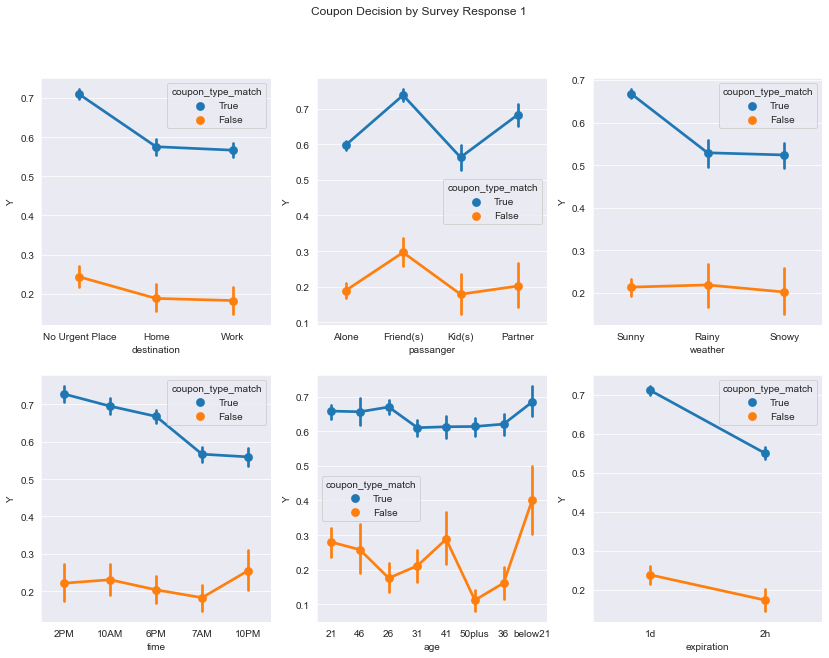

In [127]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

fig.suptitle('Coupon Decision by Survey Response 1')

sns.pointplot(ax=axes[0, 0], data=df, x='destination', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[0, 1], data=df, x='passanger', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[0, 2], data=df, x='weather', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[1, 0], data=df, x='time', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[1, 1], data=df, x='age', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[1, 2], data=df, x='expiration', y='Y', hue = 'coupon_type_match')

Text(0.5, 0.98, 'Coupon Decision by Survey Response 2')

<AxesSubplot:xlabel='coupon', ylabel='Y'>

<AxesSubplot:xlabel='maritalStatus', ylabel='Y'>

<AxesSubplot:xlabel='education', ylabel='Y'>

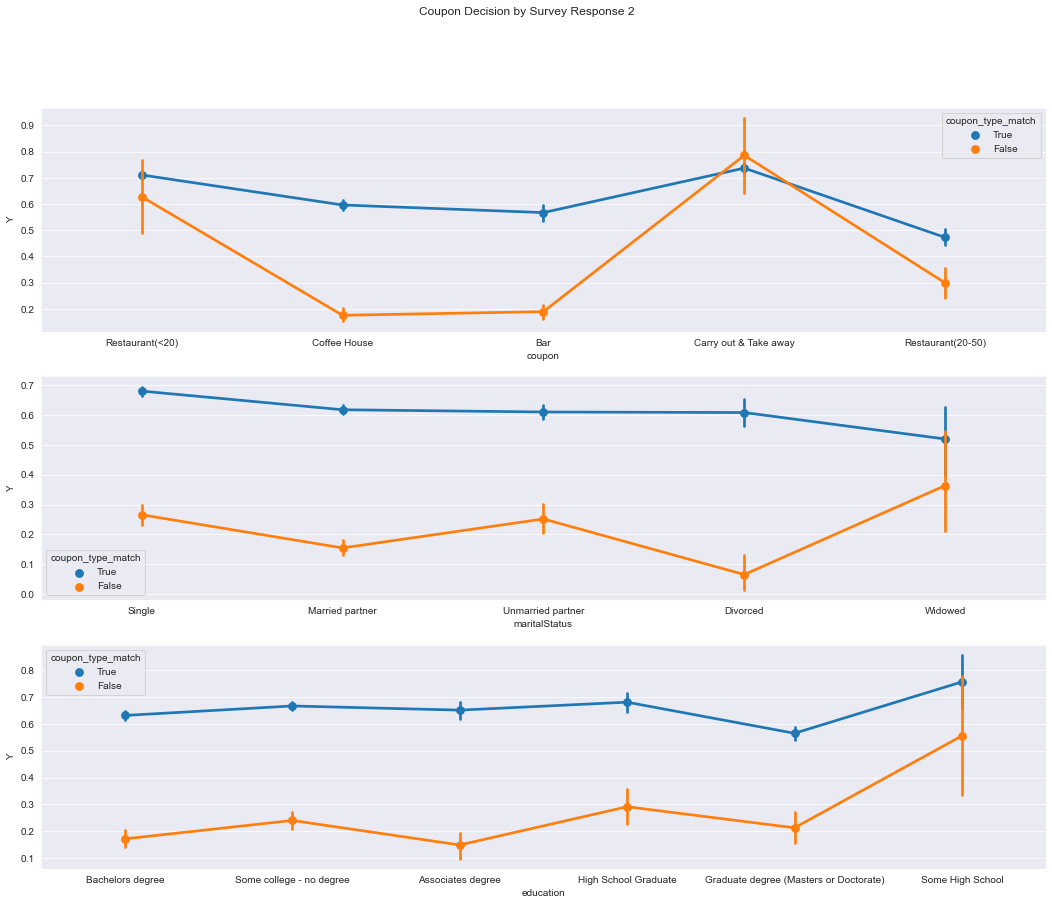

In [128]:
fig, axes = plt.subplots(3, 1, figsize=(18, 14))

fig.suptitle('Coupon Decision by Survey Response 2')

sns.pointplot(ax=axes[0], data=df, x='coupon', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[1], data=df, x='maritalStatus', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[2], data=df, x='education', y='Y', hue = 'coupon_type_match')

Text(0.5, 0.98, 'Coupon Decision by Survey Response 3')

<AxesSubplot:xlabel='CoffeeHouse', ylabel='Y'>

<AxesSubplot:xlabel='CarryAway', ylabel='Y'>

<AxesSubplot:xlabel='RestaurantLessThan20', ylabel='Y'>

<AxesSubplot:xlabel='Restaurant20To50', ylabel='Y'>

<AxesSubplot:xlabel='toCoupon_GEQ25min', ylabel='Y'>

<AxesSubplot:xlabel='coupon_type_match', ylabel='Y'>

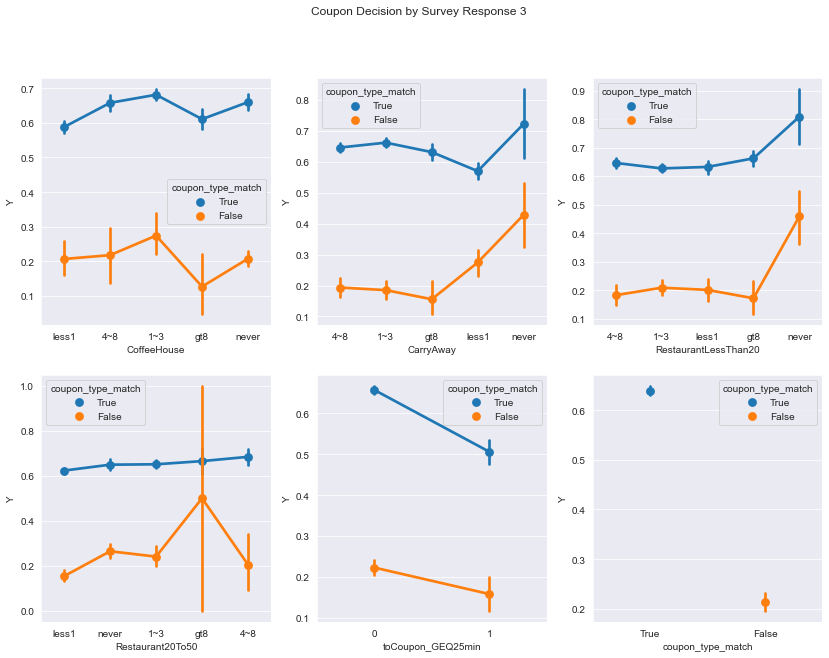

In [133]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

fig.suptitle('Coupon Decision by Survey Response 3')

sns.pointplot(ax=axes[0, 0], data=df, x='CoffeeHouse', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[0, 1], data=df, x='CarryAway', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[0, 2], data=df, x='RestaurantLessThan20', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[1, 0], data=df, x='Restaurant20To50', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[1, 1], data=df, x='toCoupon_GEQ25min', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[1, 2], data=df, x='coupon_type_match', y='Y', hue = 'coupon_type_match')

<AxesSubplot:xlabel='CoffeeHouse', ylabel='Y'>

<AxesSubplot:xlabel='Restaurant20To50', ylabel='Y'>

<AxesSubplot:xlabel='Bar', ylabel='Y'>

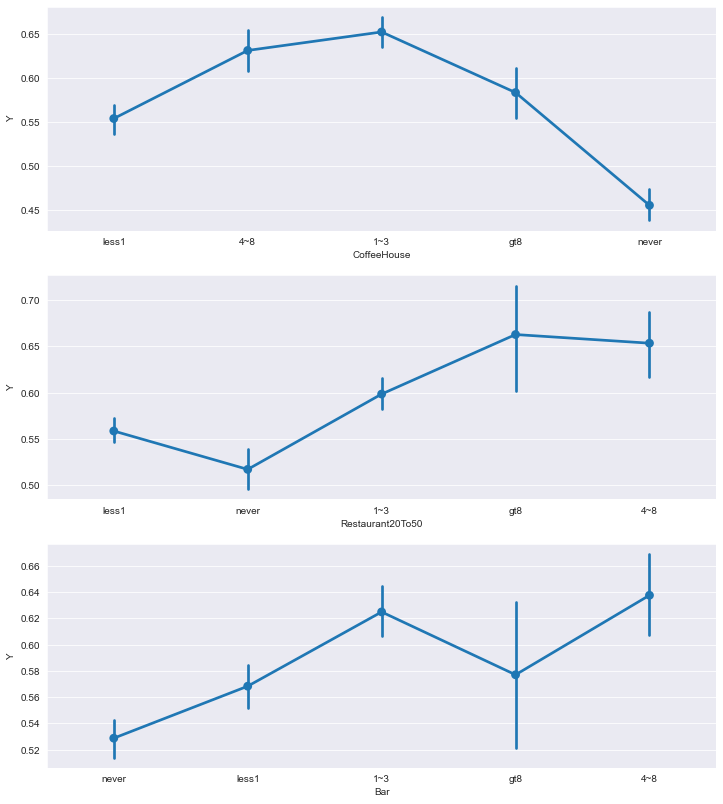

In [163]:
fig, axes = plt.subplots(3,1, figsize=(12, 14))


sns.pointplot(ax=axes[0], data=df, x='CoffeeHouse', y='Y')
sns.pointplot(ax=axes[1], data=df, x='Restaurant20To50', y='Y')
sns.pointplot(ax=axes[2], data=df, x='Bar', y='Y')

plt.savefig('Coupon.Destination.Frequencies.png')


<AxesSubplot:xlabel='age', ylabel='Y'>

<AxesSubplot:xlabel='passanger', ylabel='Y'>

<AxesSubplot:xlabel='destination', ylabel='Y'>

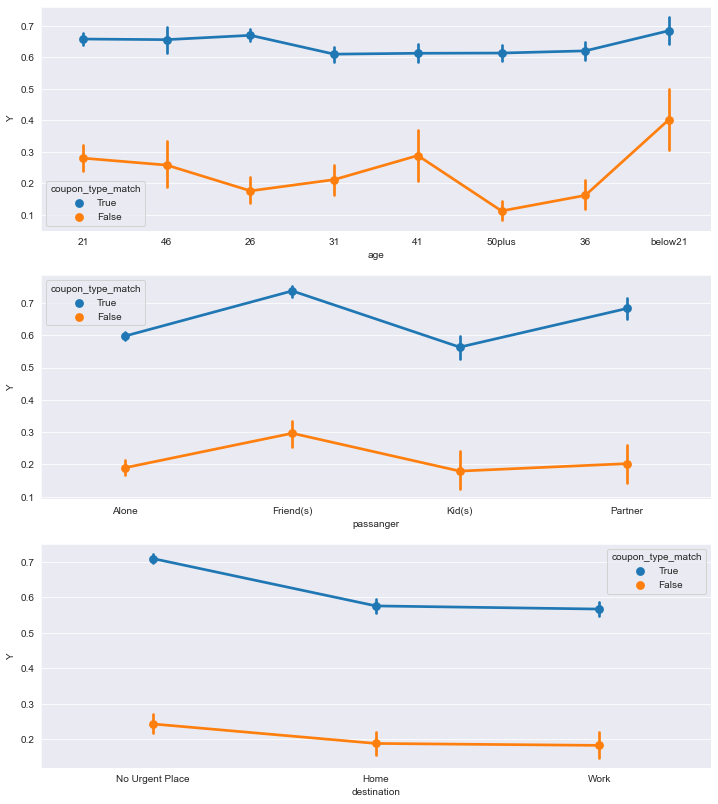

In [164]:
fig, axes = plt.subplots(3, 1, figsize=(12, 14))


sns.pointplot(ax=axes[0], data=df, x='age', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[1], data=df, x='passanger', y='Y', hue = 'coupon_type_match')
sns.pointplot(ax=axes[2], data=df, x='destination', y='Y', hue = 'coupon_type_match')

plt.savefig('Coupon.byTRUEFALSE.png')

<AxesSubplot:xlabel='age', ylabel='Y'>

<AxesSubplot:xlabel='passanger', ylabel='Y'>

<AxesSubplot:xlabel='destination', ylabel='Y'>

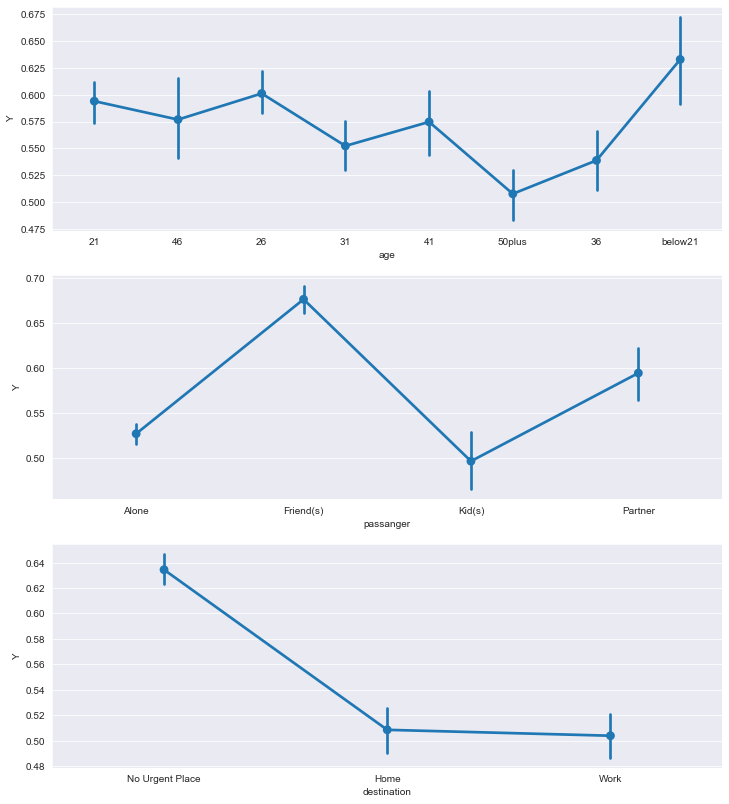

In [165]:
fig, axes = plt.subplots(3,1, figsize=(12, 14))


sns.pointplot(ax=axes[0], data=df, x='age', y='Y')
sns.pointplot(ax=axes[1], data=df, x='passanger', y='Y')
sns.pointplot(ax=axes[2], data=df, x='destination', y='Y')

plt.savefig('Coupon.by.png')

In [174]:
df_friends = df[df['passanger'] == 'Friend(s)' ] #and df[df['destination'] == 'No Urgent Place' ]
df_friends_dest = df_friends[df_friends['destination'] == 'No Urgent Place' ]
df_friends_dest.head()
df_friends_dest.shape

,destination,passanger,weather,time,coupon,expiration,age,maritalStatus,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ25min,Y,coupon_type_match
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,0,True
2,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,1,False
3,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,0,True
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,0,True
5,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,2h,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,0,True


(3139, 17)

<AxesSubplot:xlabel='age', ylabel='Y'>

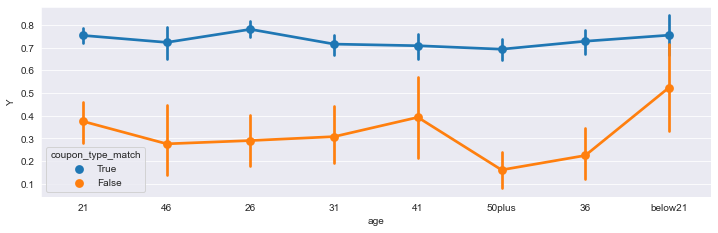

In [190]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 3.5)
sns.pointplot(data=df_friends_dest, x='age', y='Y', hue = 'coupon_type_match')
plt.savefig('Accept.by.png')

In [177]:
df_friends_dest['Y'].groupby(df_friends_dest['coupon_type_match']).agg(['mean','count']).sort_values(by=['mean'], ascending = False)

,mean,count
coupon_type_match,,
True,0.737348,2707
False,0.296296,432


In [178]:
df_friends_dest['Y'].groupby(df_friends_dest['expiration']).agg(['mean','count']).sort_values(by=['mean'], ascending = False)

,mean,count
expiration,,
1d,0.739072,1487
2h,0.620460,1652


In [187]:
df_weather = df[df['weather'] == 'Sunny' ]
df_env = df_weather[df_weather['expiration'] == '1d' ]
df_env.head()
df_env.shape

,destination,passanger,weather,time,coupon,expiration,age,maritalStatus,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ25min,Y,coupon_type_match
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,1,True
2,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,1,False
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,0,True
6,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,0,True
7,No Urgent Place,Friend(s),Sunny,2PM,Restaurant(<20),1d,21,Single,Bachelors degree,never,less1,4~8,4~8,less1,0,1,True


(5227, 17)

<AxesSubplot:xlabel='time', ylabel='Y'>

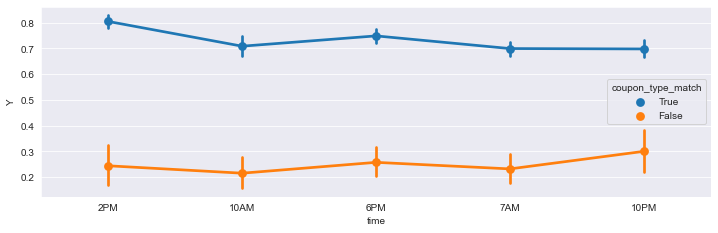

In [189]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 3.5)
sns.pointplot(data=df_env, x='time', y='Y', hue = 'coupon_type_match')
plt.savefig('Accept.env.png')

<AxesSubplot:xlabel='time', ylabel='Y'>

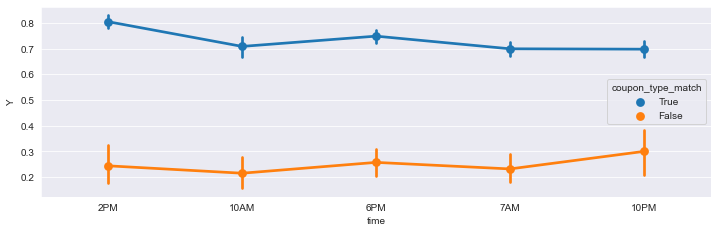

In [193]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 3.5)
sns.pointplot(data=df_env, x='time', y='Y', hue = 'coupon_type_match')


In [194]:
df['Y'].describe()

count    12057.000000
mean         0.569545
std          0.495160
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64